In [1]:
#Importing libraries

import re
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tv-shows-on-ott-platforms/TV_Shows.csv
/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#reading the data
data=pd.read_csv("/kaggle/input/tv-shows-on-ott-platforms/TV_Shows.csv")

In [3]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [4]:
#looking at the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1010 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [5]:
#Converting the percentages to number

data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [6]:
#Removing the "+" sign from age rating

data["Age"] = data["Age"].str.replace("+","", regex=True)

In [7]:
#Converting it to numeric 

data['Age'] = pd.to_numeric(data['Age'],errors='coerce')

In [8]:
#Final data

data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1


In [9]:
#Data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              2620 non-null   float64
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1010 non-null   float64
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 482.3+ KB


In [10]:
age_groups = pd.DataFrame(data['Age'].value_counts()).reset_index()
age_groups = age_groups.rename(columns={'index':'Age Group', 'Age':'Count'})
age_groups

,Age Group,Count
0,16.0,1018
1,7.0,848
2,18.0,750
3,13.0,4


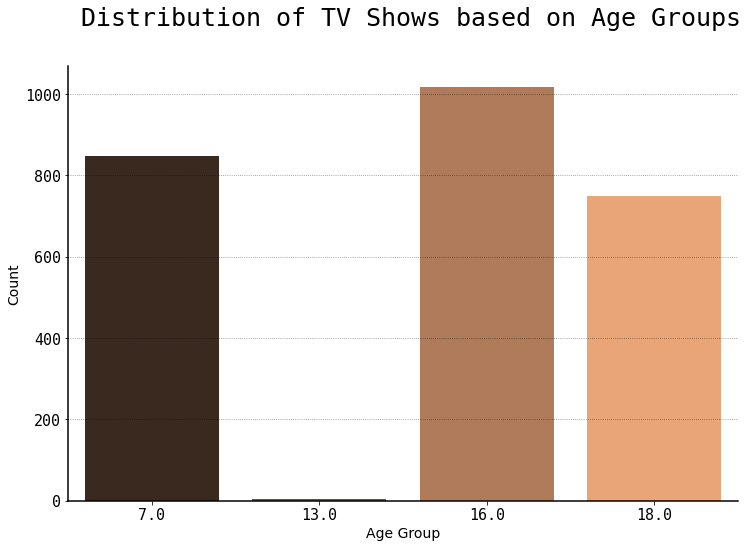

In [11]:
plt.figure(figsize = (12, 8))

a = sns.barplot(x='Age Group', y='Count', data = age_groups, palette='copper',linewidth=1.5)

plt.figtext(x=0.14, y=0.95,
            s='Distribution of TV Shows based on Age Groups', 
            fontsize=25, fontname='monospace')

plt.xticks(fontsize=15, fontname='monospace')
plt.yticks(fontsize=15, fontname='monospace')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', color='black', linestyle = ':', alpha=0.5)

for q in [a]:
    for w in ['bottom', 'left']:
        q.spines[w].set_linewidth(1.5)
    for w in ['right', 'top']:
        q.spines[w].set_visible(False)
        
plt.show()

In [12]:
df=pd.read_csv("/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv")

In [13]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [14]:
def get_unique_values(genre_list):
    more_than_one = 0
    only_one = 0
    unique_genre = []
    for genres in genre_list:
        try:
            values = genres.split(",")
            if len(values) > 1:
                more_than_one += 1
            elif len(values) == 1:
                only_one += 1
        except:
            pass
        for genre in values:
            if genre not in unique_genre:
                unique_genre.append(genre)
    
    return unique_genre, more_than_one, only_one

In [15]:
unique_genre, more_than_one, only_one = get_unique_values(df['Genres'].unique())

print('Total Number of Unique Genres are: ', len(unique_genre))
print('Movies having more than one genre: ', more_than_one)
print('Movies having only one genre: ', only_one)

Total Number of Unique Genres are:  27
Movies having more than one genre:  1394
Movies having only one genre:  24


In [16]:
genre_dict = {}

for val in unique_genre:
    genre_dict[val] = 0

In [17]:
# Removing all the null values from genres
new_df = df[df['Genres'].notna()]

In [18]:
for genres in unique_genre:
    count = new_df[new_df['Genres'].str.contains(genres)].shape[0]
    genre_dict[genres] = count

In [19]:
genre_count = pd.DataFrame(columns=['Genre', 'Count'], 
                           data = {'Genre':[val for val in genre_dict.keys()],
                                    'Count': [val for val in genre_dict.values()]}).sort_values(by='Count', ascending=False).reset_index(drop=True)

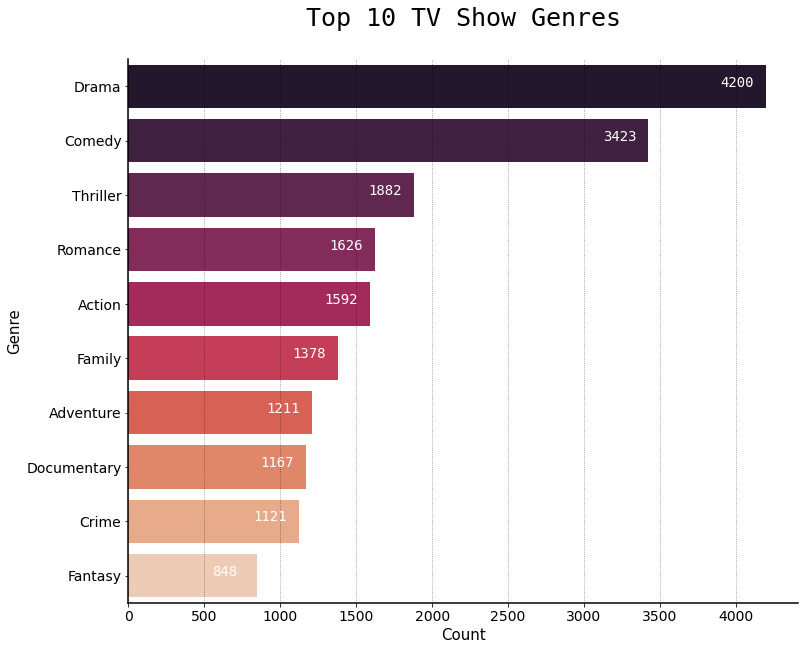

In [20]:
plt.figure(figsize=(12,10))
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5)
plt.title('Top 10 TV Show Genres', fontname='monospace', fontsize=25, y=1.05)
a = sns.barplot(x='Count', y='Genre', data=genre_count[:10], palette='rocket')

genres = genre_count['Genre'][:10].tolist()
for i, val in enumerate(genres):
    x_val = genre_count[genre_count['Genre'] == val]['Count'].values[0]
    a.text(y=i, x= x_val -300, 
           s=str(x_val),
          fontsize=14, fontname='monospace', color='white')
    
for q in [a]:
    for w in ['bottom', 'left']:
        q.spines[w].set_linewidth(1.5)
    for w in ['right', 'top']:
        q.spines[w].set_visible(False)

plt.xlabel('Count', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [21]:
#Taking the values

titles=data["Title"].values

In [22]:
#Joining into a single string

text=' '.join(titles)

In [23]:
len(text)

100723

In [24]:
#How it looks

text[1000:1500]

"er Love, Death & Robots Marvel's Jessica Jones New Girl The Good Wife The Umbrella Academy Marvel's The Punisher Ash vs Evil Dead Master of None Bodyguard Schitt's Creek Narcos: Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Death Note Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth American Horror Story Gotham I Am Not Okay with This Criminal Minds The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Ch"

In [25]:
#Removing the punctuation

text = re.sub(r'[^\w\s]','',text)

In [26]:
len(text)

98984

In [27]:
#Punctuation has been removed

text[1000:1500]

'ots Marvels Jessica Jones New Girl The Good Wife The Umbrella Academy Marvels The Punisher Ash vs Evil Dead Master of None Bodyguard Schitts Creek Narcos Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Death Note Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth American Horror Story Gotham I Am Not Okay with This Criminal Minds The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Chilling Adventures of Sab'

In [28]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [29]:
#Tokenizing the text
tokens = tokenizer.tokenize(text)

In [30]:
len(tokens)

16068

In [31]:
#Now the words have been converted to tokens

tokens[1000:1010]

['Cars',
 'Getting',
 'Coffee',
 'Conan',
 'The',
 'Guild',
 'Friends',
 'from',
 'College',
 'Wormwood']

In [32]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [33]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

In [34]:
words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [35]:
#The frequency distribution of the words

freq_dist = nltk.FreqDist(words_new)

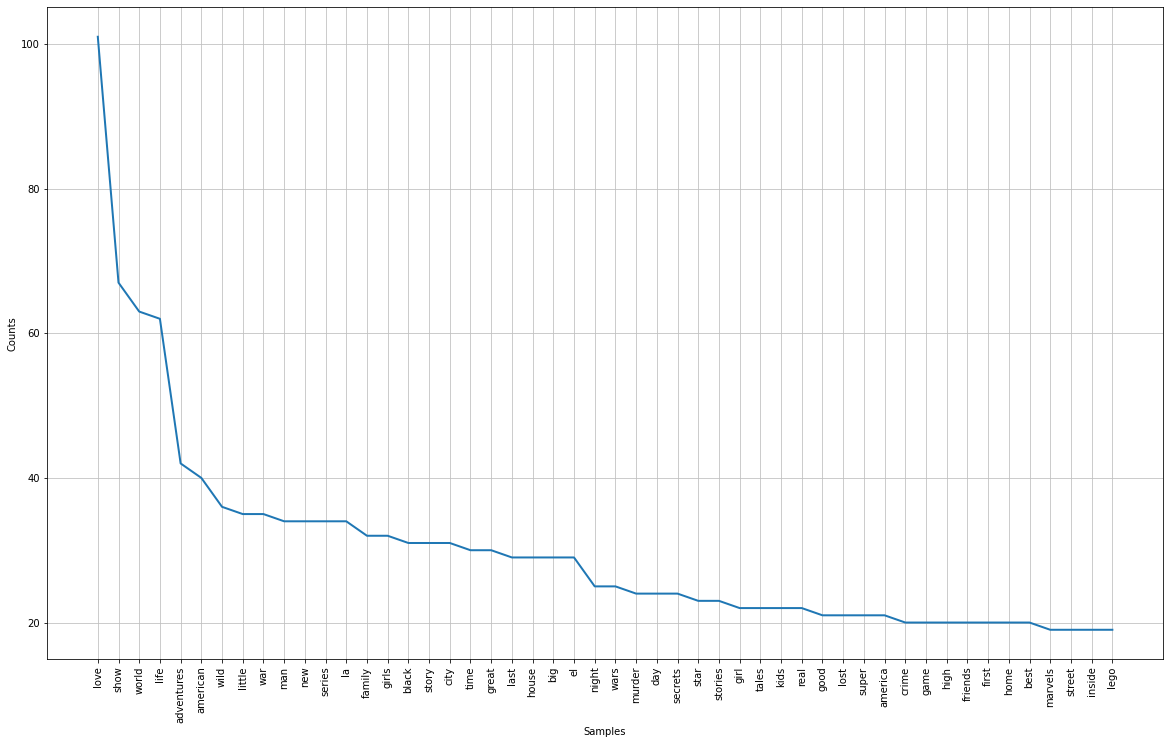

In [36]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(50)

In [37]:
#converting into string

res=' '.join([i for i in words_new if not i.isdigit()])

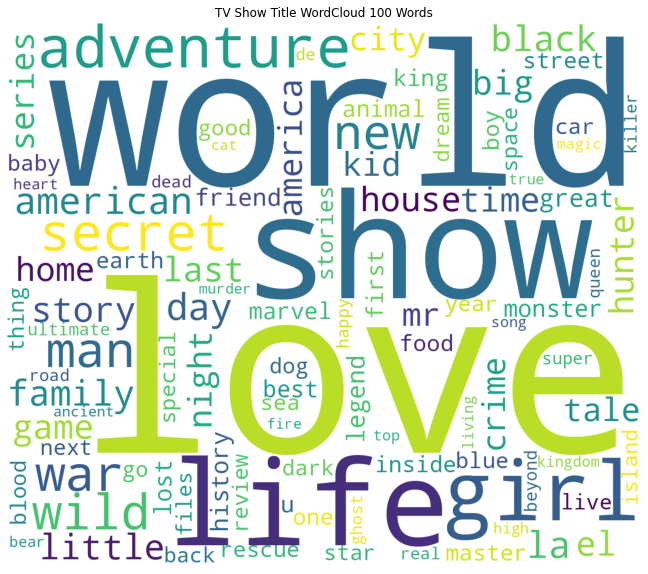

In [38]:
#wordcloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud 100 Words')
plt.axis('off')
plt.show()

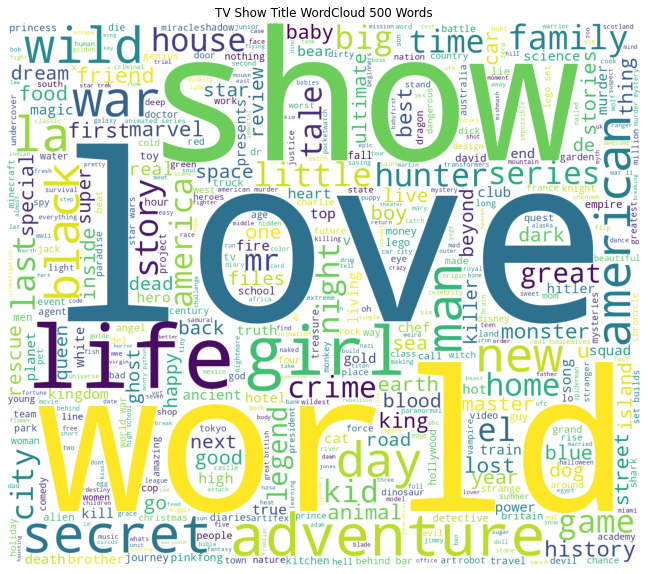

In [39]:
#wordcloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          max_words=500,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud 500 Words')
plt.axis('off')
plt.show()

In [40]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              2620 non-null   float64
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1010 non-null   float64
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 482.3+ KB


<AxesSubplot:xlabel='Year', ylabel='Count'>

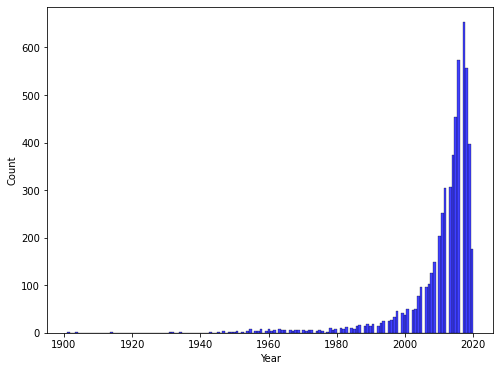

In [42]:
#overall year of release analysis

plt.subplots(figsize=(8,6))
sns.histplot(data["Year"],kde=False, color="blue")

In [43]:
print("TV Shows with highest IMDb ratings are= ")
print((data.sort_values("IMDb",ascending=False).head(20))['Title'])

TV Shows with highest IMDb ratings are= 
3023                             Destiny
0                           Breaking Bad
3747                        Malgudi Days
3177                        Hungry Henry
3567                    Band of Brothers
2365                 The Joy of Painting
4128                      Green Paradise
91                            Our Planet
3566                            The Wire
325                              Ramayan
1931                      Rick and Morty
4041                     Everyday Driver
3701                            Baseball
282                      Yeh Meri Family
3798                             The Bay
4257                  Single and Anxious
3568                        The Sopranos
4029             Harmony with A R Rahman
9             Avatar: The Last Airbender
15      Fullmetal Alchemist: Brotherhood
Name: Title, dtype: object


<AxesSubplot:xlabel='IMDb', ylabel='Title'>

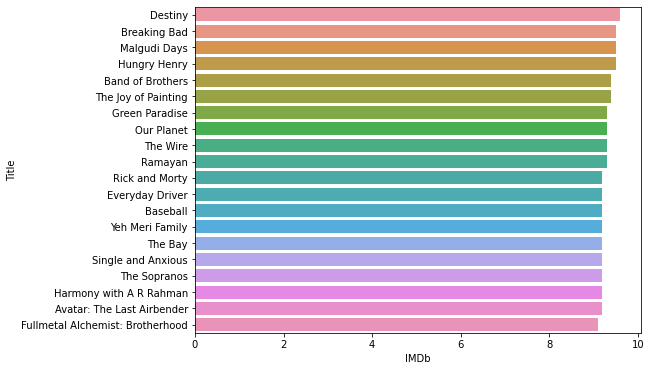

In [44]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=False).head(20))

In [45]:
print("TV Shows with lowest IMDb ratings are= ")
print((data.sort_values("IMDb",ascending=True).head(20))['Title'])

TV Shows with lowest IMDb ratings are= 
1807                                        Be With You
2999                     A Little Late with Lilly Singh
3104                                  Toddlers & Tiaras
1818                                   Game Winning Hit
3144                                  My Super Sweet 16
3145                                       The Proposal
3060    The High Fructose Adventures of Annoying Orange
3292                                   Underworld, Inc.
1498                                       The Goop Lab
4551                                       Strange Love
3309                                      AwesomenessTV
3143                                       Breadwinners
734                                              Ben 10
3048                                         Metástasis
3265                                           The View
1731                                           Bromance
4653                                        The Z Virus
1866    

<AxesSubplot:xlabel='IMDb', ylabel='Title'>

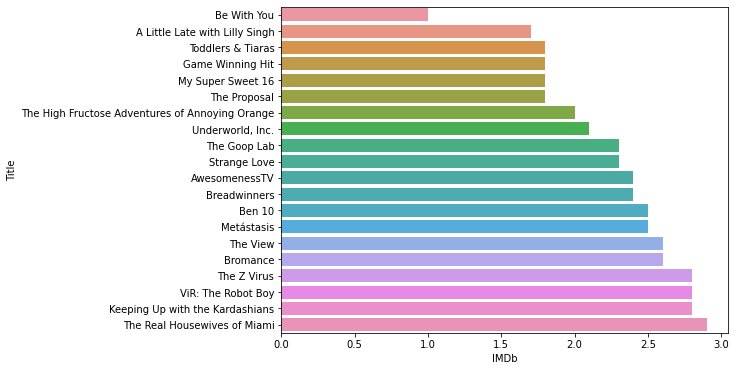

In [46]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=True).head(20))

Text(0.5, 1.0, 'IMDb Rating Distribution')

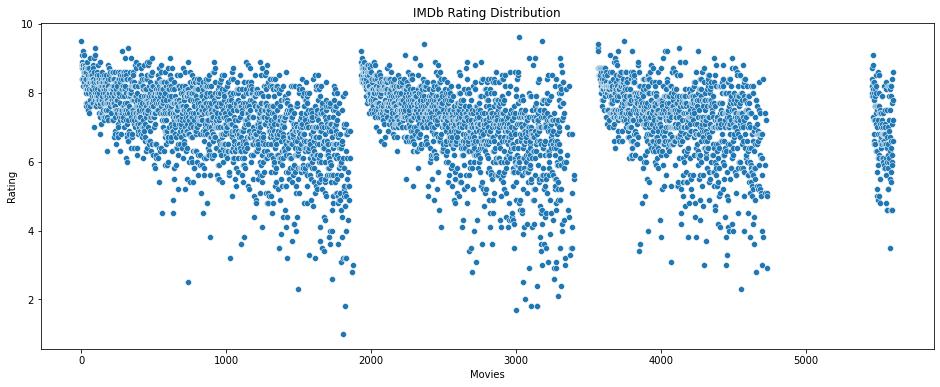

In [47]:
#Overall data of IMDb ratings

plt.figure(figsize=(16, 6))

sns.scatterplot(data=data['IMDb'])
plt.ylabel("Rating")
plt.xlabel('Movies')
plt.title("IMDb Rating Distribution")

In [48]:
print("TV Shows with highest Rotten Tomatoes scores are= ")
print((data.sort_values("Rotten Tomatoes",ascending=False).head(20))['Title'])

TV Shows with highest Rotten Tomatoes scores are= 
2119              Afro Samurai
1996                    Spaced
171              Ripper Street
172                  Feel Good
2035            Please Like Me
2025              Inside No. 9
2016                Elfen Lied
192     Middleditch & Schwartz
194                Dirty Money
199               Chef's Table
202                 Soul Eater
2068             Prime Suspect
1992               Tokyo Ghoul
208                      Hilda
1981               Steins;Gate
222                  Imposters
223              Queer as Folk
1972               Black Books
227                Chewing Gum
230                  The Order
Name: Title, dtype: object


<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Title'>

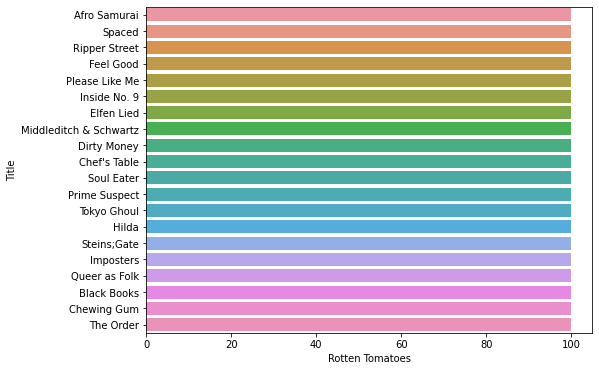

In [49]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= data.sort_values("Rotten Tomatoes",ascending=False).head(20))

In [50]:
print("TV Shows with lowest Rotten Tomatoes scores are= ")
print((data.sort_values("Rotten Tomatoes",ascending=True).head(20))['Title'])

TV Shows with lowest Rotten Tomatoes scores are= 
630                             Another Life
840                               The I-Land
2958    Saved by the Bell: The College Years
2540                                Rosewood
2585                                  Damien
322                               Insatiable
5506                       Marvel's Inhumans
3881                               The Bible
4196                            Flash Gordon
3948                    Crisis in Six Scenes
1426                            Pacific Heat
2625            The Four: Battle for Stardom
3061                                   .hack
687                               Disjointed
3895                            Texas Rising
1507                                Westside
2308                              Outsourced
4159                              18 to Life
3005                                 Man Up!
834                                    Valor
Name: Title, dtype: object


<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Title'>

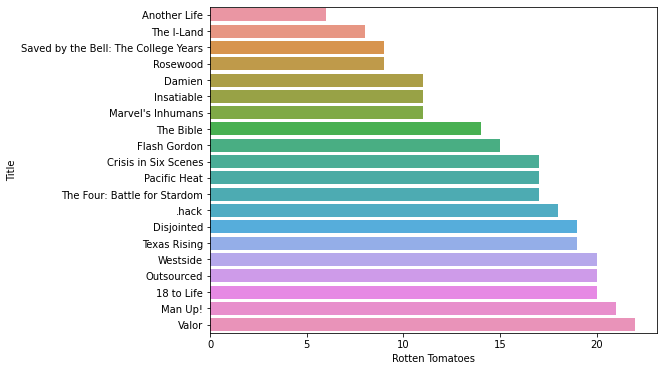

In [51]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= data.sort_values("Rotten Tomatoes",ascending=True).head(20))

Text(0.5, 1.0, 'Rotten Tomatoes Score Distribution')

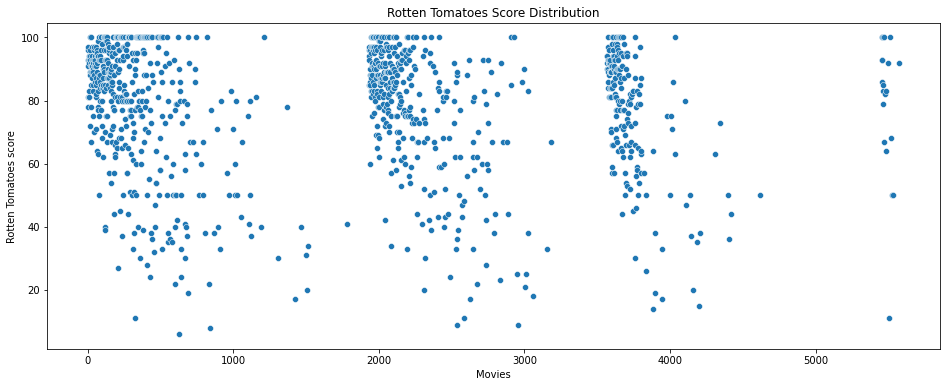

In [52]:
#Overall data of Rotten Tomatoes scores

plt.figure(figsize=(16, 6))
sns.scatterplot(data=data['Rotten Tomatoes'])
plt.ylabel("Rotten Tomatoes score")
plt.xlabel('Movies')
plt.title("Rotten Tomatoes Score Distribution")

In [53]:
#selecting netflix shows
netflix=data[data["Netflix"]==1]

In [54]:
print("Number of shows on Netflix= ", len(netflix))

Number of shows on Netflix=  1931


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year'>

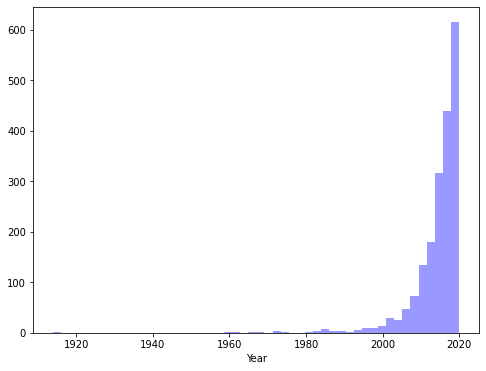

In [55]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["Year"],kde=False, color="blue")

<AxesSubplot:xlabel='Age'>

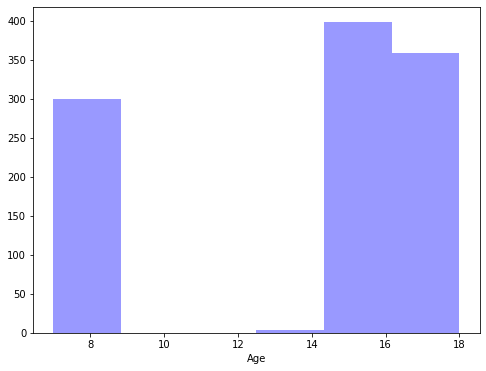

In [56]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["Age"],kde=False, color="blue")

<AxesSubplot:xlabel='IMDb'>

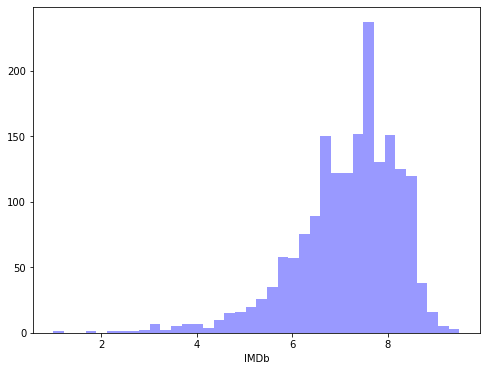

In [57]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["IMDb"],kde=False, color="blue")

<AxesSubplot:xlabel='Rotten Tomatoes'>

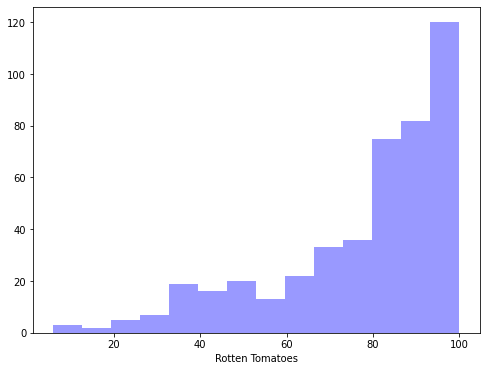

In [58]:
plt.subplots(figsize=(8,6))
sns.distplot(netflix["Rotten Tomatoes"],kde=False, color="blue")

In [59]:
print("Netflix Shows with highest IMDb ratings are= ")
print((netflix.sort_values("IMDb",ascending=False).head(10))['Title'])

Netflix Shows with highest IMDb ratings are= 
0                          Breaking Bad
325                             Ramayan
91                           Our Planet
282                     Yeh Meri Family
9            Avatar: The Last Airbender
3                              Sherlock
97                      The Vietnam War
15     Fullmetal Alchemist: Brotherhood
612                  Zindagi Gulzar Hai
341                              Africa
Name: Title, dtype: object


In [60]:
print("Netflix Shows with lowest IMDb ratings are= ")
print((netflix.sort_values("IMDb",ascending=True).head(10))['Title'])

Netflix Shows with lowest IMDb ratings are= 
1807           Be With You
1818      Game Winning Hit
1498          The Goop Lab
734                 Ben 10
1731              Bromance
1866    ViR: The Robot Boy
1872           For the Win
1789                   阳关道
1025          The Bachelor
1820              Shopkins
Name: Title, dtype: object


In [61]:
print("Netflix Shows with highest Rotten Tomatoes score are= ")
print((netflix.sort_values("Rotten Tomatoes",ascending=False).head(10))['Title'])

Netflix Shows with highest Rotten Tomatoes score are= 
256            The Innocence Files
275    Abstract: The Art of Design
223                  Queer as Folk
227                    Chewing Gum
230                      The Order
238    Voltron: Legendary Defender
245                 Better Than Us
274                    Secret City
285                        Flowers
348                           1983
Name: Title, dtype: object


In [62]:
print("Netflix Shows with lowest Rotten Tomatoes score are= ")
print((netflix.sort_values("Rotten Tomatoes",ascending=True).head(10))['Title'])

Netflix Shows with lowest Rotten Tomatoes score are= 
630               Another Life
840                 The I-Land
322                 Insatiable
1426              Pacific Heat
687                 Disjointed
1507                  Westside
598                    Between
834                      Valor
643     The Mysteries of Laura
426       Friends from College
Name: Title, dtype: object


In [63]:
#Taking the title and rating data

netflix1=netflix.sort_values("IMDb",ascending=False).head(100)[['Title',"IMDb"]]
netflix1.head()

,Title,IMDb
0,Breaking Bad,9.5
325,Ramayan,9.3
91,Our Planet,9.3
282,Yeh Meri Family,9.2
9,Avatar: The Last Airbender,9.2


In [64]:
#Converting it into a tuple

tuples_netflix_imdb = [tuple(x) for x in netflix1.values]

In [65]:
#Looks like this

tuples_netflix_imdb[0:10]

[('Breaking Bad', 9.5),
 ('Ramayan', 9.3),
 ('Our Planet', 9.3),
 ('Yeh Meri Family', 9.2),
 ('Avatar: The Last Airbender', 9.2),
 ('Sherlock', 9.1),
 ('The Vietnam War', 9.1),
 ('Fullmetal Alchemist: Brotherhood', 9.1),
 ('Zindagi Gulzar Hai', 9.0),
 ('Africa', 9.0)]

In [66]:
#Making a wordcloud

wordcloud_netflix_imdb = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuples_netflix_imdb))

Text(0.5, 1.0, 'TV Shows based on IMDb rating(Top 100)')

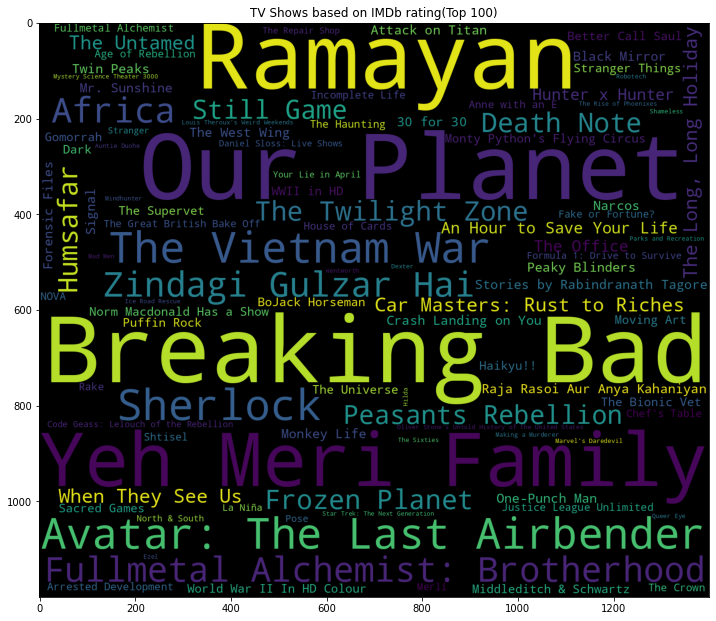

In [67]:
plt.subplots(figsize=(12,12))
plt.imshow(wordcloud_netflix_imdb)
plt.title("TV Shows based on IMDb rating(Top 100)")

In [68]:
#Taking the title value and Rotten Tomatoes Score

netflix2=netflix.sort_values("Rotten Tomatoes",ascending=False).head(100)[['Title',"Rotten Tomatoes"]]
netflix2.head()

,Title,Rotten Tomatoes
256,The Innocence Files,100.0
275,Abstract: The Art of Design,100.0
223,Queer as Folk,100.0
227,Chewing Gum,100.0
230,The Order,100.0


In [69]:
#Converting to Tuple

tuples_netflix_tomatoes = [tuple(x) for x in netflix2.values]

In [70]:
#Word Cloud generation

wordcloud_netflix_tomatoes = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuples_netflix_tomatoes))

Text(0.5, 1.0, 'TV Shows based on Rotten Tomatoes Score(Top 100)')

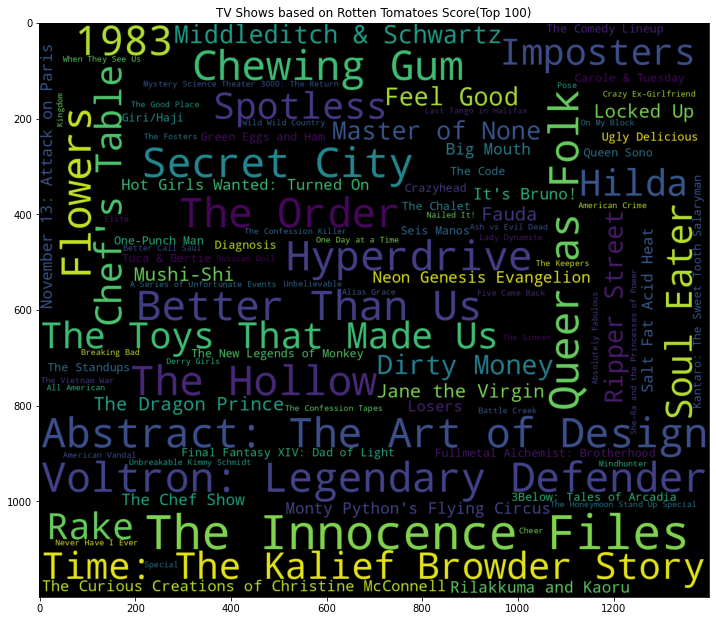

In [71]:
plt.subplots(figsize=(12,12))
plt.imshow(wordcloud_netflix_tomatoes)

plt.title("TV Shows based on Rotten Tomatoes Score(Top 100)")

In [72]:
#Taking the relevant data

ratings=data[["Title",'IMDb',"Rotten Tomatoes"]]
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.5,96.0
1,Stranger Things,8.8,93.0
2,Money Heist,8.4,91.0
3,Sherlock,9.1,78.0
4,Better Call Saul,8.7,97.0


In [73]:
len(ratings)

5611

In [74]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   IMDb             4450 non-null   float64
 2   Rotten Tomatoes  1010 non-null   float64
dtypes: float64(2), object(1)
memory usage: 131.6+ KB


In [75]:
#Removing the data

ratings=ratings.dropna()

In [76]:
ratings["IMDb"]=ratings["IMDb"]*10

In [77]:
#New data

ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,95.0,96.0
1,Stranger Things,88.0,93.0
2,Money Heist,84.0,91.0
3,Sherlock,91.0,78.0
4,Better Call Saul,87.0,97.0


In [78]:
#Input data

X=ratings[["IMDb","Rotten Tomatoes"]]

In [79]:
#Input data

X=ratings[["IMDb","Rotten Tomatoes"]]

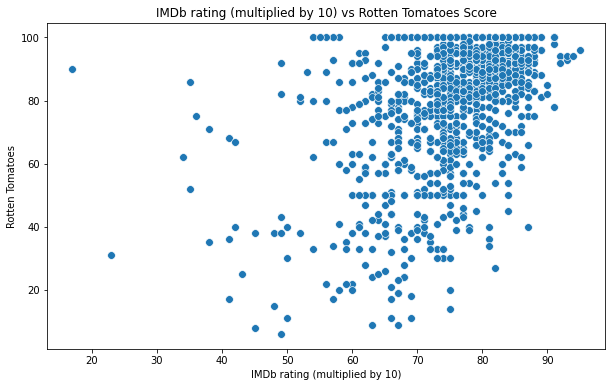

In [80]:
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',  data = X  ,s = 60 )
plt.xlabel('IMDb rating (multiplied by 10)')
plt.ylabel('Rotten Tomatoes') 
plt.title('IMDb rating (multiplied by 10) vs Rotten Tomatoes Score')
plt.show()

In [81]:
#Importing KMeans from sklearn

from sklearn.cluster import KMeans

In [82]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

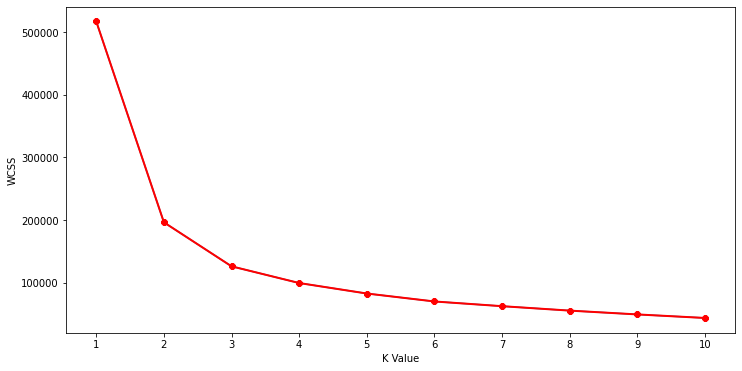

In [83]:
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [84]:
#Taking 4 clusters

km=KMeans(n_clusters=4)

In [85]:
#Fitting the input data

km.fit(X)

KMeans(n_clusters=4)

In [86]:
#predicting the labels of the input data

y=km.predict(X)

In [87]:
#adding the labels to a column named label

ratings["label"] = y

In [88]:
#The new dataframe with the clustering done

ratings.head()

,Title,IMDb,Rotten Tomatoes,label
0,Breaking Bad,95.0,96.0,0
1,Stranger Things,88.0,93.0,0
2,Money Heist,84.0,91.0,0
3,Sherlock,91.0,78.0,0
4,Better Call Saul,87.0,97.0,0


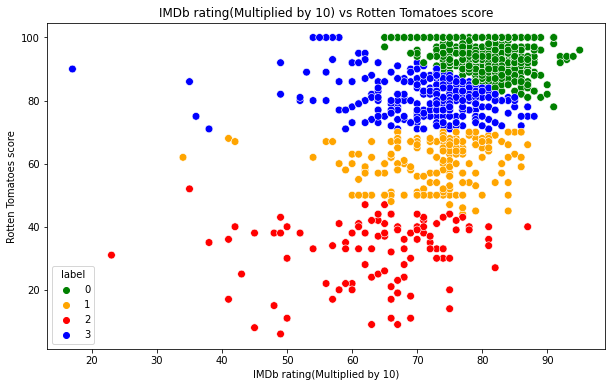

In [89]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="label",  
                 palette=['green','orange','red',"blue"], legend='full',data = ratings  ,s = 60 )

plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Rotten Tomatoes score') 
plt.title('IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')
plt.show()

In [90]:
print('Number of Cluster 0 TV Shows are=')
print(len(ratings[ratings["label"]==0]))
print("--------------------------------------------")
print('Number of Cluster 1 TV Shows are=')
print(len(ratings[ratings["label"]==1]))
print("--------------------------------------------")
print('Number of Cluster 2 TV Shows are=')
print(len(ratings[ratings["label"]==2]))
print("--------------------------------------------")
print('Number of Cluster 3 TV Shows are=')
print(len(ratings[ratings["label"]==3]))
print("--------------------------------------------")

Number of Cluster 0 TV Shows are=
419
--------------------------------------------
Number of Cluster 1 TV Shows are=
181
--------------------------------------------
Number of Cluster 2 TV Shows are=
105
--------------------------------------------
Number of Cluster 3 TV Shows are=
302
--------------------------------------------


In [91]:
print('TV Shows in cluster 0')

print(ratings[ratings["label"]==0]["Title"].values)

TV Shows in cluster 0
['Breaking Bad' 'Stranger Things' 'Money Heist' 'Sherlock'
 'Better Call Saul' 'The Office' 'Black Mirror' 'Supernatural'
 'Peaky Blinders' 'Dark' 'Attack on Titan' 'Narcos'
 'Fullmetal Alchemist: Brotherhood' 'Community' 'Mindhunter'
 'Parks and Recreation' "Marvel's Daredevil" 'Twin Peaks' 'One-Punch Man'
 'Outlander' 'Shameless' 'The Good Place' 'The Haunting' 'The Blacklist'
 'The Flash' 'The Last Kingdom' 'Mad Men' 'Lucifer'
 'Orange Is the New Black' 'The End of the F***ing World' 'The Crown'
 'The 100' 'When They See Us' 'How to Get Away with Murder' 'Elite'
 'BoJack Horseman' 'Never Have I Ever' 'Penny Dreadful'
 "Marvel's Agents of S.H.I.E.L.D." 'Dead to Me' 'Unorthodox' 'Sense8'
 'Sacred Games' 'American Crime Story' 'Unbelievable' 'The IT Crowd'
 'The Twilight Zone' 'YOU' 'Sex Education'
 'Star Trek: The Next Generation' 'Broadchurch' 'Kingdom' 'The Sinner'
 'New Girl' 'The Good Wife' 'Ash vs Evil Dead' 'Master of None'
 'Bodyguard' 'Narcos: Mexico' 'Ba

In [92]:
print('TV Shows in cluster 1')

print(ratings[ratings["label"]==1]["Title"].values)

TV Shows in cluster 1
['The Witcher' 'After Life' 'Altered Carbon' "Marvel's The Punisher"
 "Schitt's Creek" 'Waco' 'Anne with an E' 'Weeds' 'Locke & Key'
 'Hollywood' 'The Tudors' 'The Inbetweeners' 'Marco Polo' 'Limitless'
 'Messiah' 'Haven' 'Queen of the South' 'Bloodline'
 "Don't F**k with Cats: Hunting an Internet Killer" 'Lost Girl'
 'Disenchantment' 'Heartland' 'Madam Secretary' 'Lilyhammer'
 'Star Trek: Enterprise' 'Versailles' 'Star-Crossed' 'The Politician'
 'Marcella' 'Beauty and the Beast' 'Spinning Out' 'Containment' 'Derek'
 'Mars' 'Daybreak' 'Private Practice' 'Knightfall'
 "Inside Bill's Brain: Decoding Bill Gates" 'Bonding' 'Young & Hungry'
 'The English Game' 'Trinkets' 'Dark Tourist' 'Roswell, New Mexico'
 'Damnation' 'Jericho' 'American Odyssey' 'AJ and the Queen' 'The Eddy'
 'A.D. The Bible Continues' 'The Letter for the King' 'The Mist'
 'The Final Table' 'The Assets' 'Sick Note' 'Typewriter' 'Freud'
 'The Good Cop' 'B: The Beginning' 'White Lines'
 "Dolly Parton'

In [93]:
print('TV Shows in cluster 2')

print(ratings[ratings["label"]==2]["Title"].values)

TV Shows in cluster 2
['NCIS' '13 Reasons Why' 'The Originals' "Marvel's Iron Fist" 'Shooter'
 '3%' 'Hemlock Grove' 'Insatiable' 'The Black Donnellys' 'The Night Shift'
 'Bordertown' 'Fuller House' 'Friends from College' 'Gypsy' 'Lovesick'
 'Taken' 'Paradise PD' 'The Messengers' 'October Faction' 'Flaked'
 'Too Hot to Handle' 'Girlboss' 'Nightflyers' 'Between'
 'Norm Macdonald Has a Show' 'Turn Up Charlie' 'Another Life'
 'The Mysteries of Laura' 'Selection Day' 'HAPPYish' 'Chambers'
 'Rebellion' 'Life Sentence' 'Disjointed' 'Taxi Brooklyn' 'Valor'
 'The I-Land' 'Brews Brothers' 'Soundtrack' 'Marseille'
 'The Big Flower Fight' 'Chelsea' 'Behind Enemy Lines' 'Prank Encounters'
 'Extraterrestrial' 'Pacific Heat' 'All About the Washingtons'
 'The Goop Lab' 'Westside' 'The In-Laws' 'Footprints'
 'Legend of the Seeker' 'New Amsterdam' 'Battlestar Galactica' 'Reprisal'
 'Breakout Kings' 'Outsourced'
 'Lincoln Rhyme: Hunt for the Bone Collector' 'The Purge' 'The Firm'
 'Four Weddings and a Fu

In [94]:
print('TV Shows in cluster 3')

print(ratings[ratings["label"]==3]["Title"].values)

TV Shows in cluster 3
['The Walking Dead' 'Ozark' 'Dexter' 'House of Cards' "Grey's Anatomy"
 'Arrested Development' 'The Vampire Diaries' 'Family Guy'
 'Pretty Little Liars' 'Arrow' 'Tiger King: Murder, Mayhem and Madness'
 'Love, Death & Robots' "Marvel's Jessica Jones" 'The Umbrella Academy'
 'The West Wing' 'Once Upon a Time' 'Riverdale' 'Gotham'
 'I Am Not Okay with This' 'Star Trek' 'The OA' 'Outer Banks'
 'Chilling Adventures of Sabrina' 'Doctor Foster' 'Into the Badlands'
 'Gossip Girl' 'Lost in Space' "DC's Legends of Tomorrow" 'Charmed'
 'Maniac' "Marvel's Luke Cage" 'The Stranger' 'Into the Night'
 'Mystery Science Theater 3000' 'Reign' 'The Borgias'
 'Designated Survivor' 'Hell on Wheels' 'Hawaii Five-0'
 "Marvel's The Defenders" 'Supergirl' 'Star Trek: Voyager'
 'The Shannara Chronicles' 'Hart of Dixie' "TURN: Washington's Spies"
 'Episodes' 'Living with Yourself' 'Nurse Jackie' 'Glee' 'Helix' 'Safe'
 'Evil Genius' 'Glitch' 'GHOUL' 'The Society' 'Dracula' 'Quantico'
 'The 